## UNAD - Analisis de Datos - 2024
## Jesualdo Gutièrrez
### Dataset – Titanic dataset
### Set de datos sobre los pasajeros del Titanic. Permite practicar modelos de clasificación y regresión para **predecir quién sobrevivió al naufragio**

### Pasos de la actividad
##### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
##### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.
##### 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.
##### 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.
##### 5. Entrenar el modelo configurando los diferentes hiperparámetros.
##### 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.
##### 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo
##### 8. Interpretar, analizar y documentar los resultados obtenidos.
##### Cargar en GitHub el código del modelo diseñado https://github.com/

### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

# Cargar el dataset
file_path = './Titanic-Dataset.csv'
titanic_df = pd.read_csv(file_path)

# Mostrar las primeras filas del dataset
print(titanic_df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

C:\Users\jesua\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


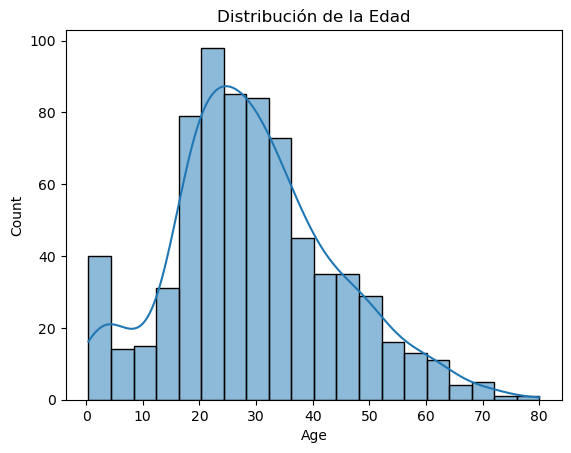

AttributeError: 'numpy.int64' object has no attribute 'startswith'

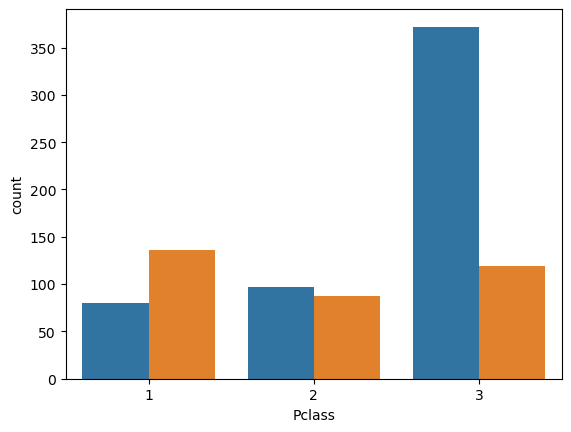

In [16]:
# Información general del dataset
print(titanic_df.info())

# Estadísticas descriptivas
print(titanic_df.describe())

# Comprobar valores nulos
print(titanic_df.isnull().sum())

# Distribución de la edad
sns.histplot(titanic_df['Age'].dropna(), kde=True)
plt.title('Distribución de la Edad')
plt.show()

# Supervivencia por clase
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)
plt.title('Supervivencia por Clase')
plt.show()

### 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

In [17]:
# Llenar valores nulos de la edad con la mediana
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Llenar valores nulos de la tarifa con la mediana
titanic_df['Fare'].fillna(titanic_df['Fare'].median(), inplace=True)

# Llenar valores nulos de embarque con el valor más frecuente
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Eliminar columnas no necesarias
titanic_df.drop(columns=['Cabin', 'Ticket', 'Name'], inplace=True)

# Convertir variables categóricas en dummy variables
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)

# Verificar el dataset después del preprocesamiento
print(titanic_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Age          891 non-null    float64
 4   SibSp        891 non-null    int64  
 5   Parch        891 non-null    int64  
 6   Fare         891 non-null    float64
 7   Sex_male     891 non-null    bool   
 8   Embarked_Q   891 non-null    bool   
 9   Embarked_S   891 non-null    bool   
dtypes: bool(3), float64(2), int64(5)
memory usage: 51.5 KB
None


### 4. Dividir el dataset en Train y Test para evaluar correctamente el modelo.

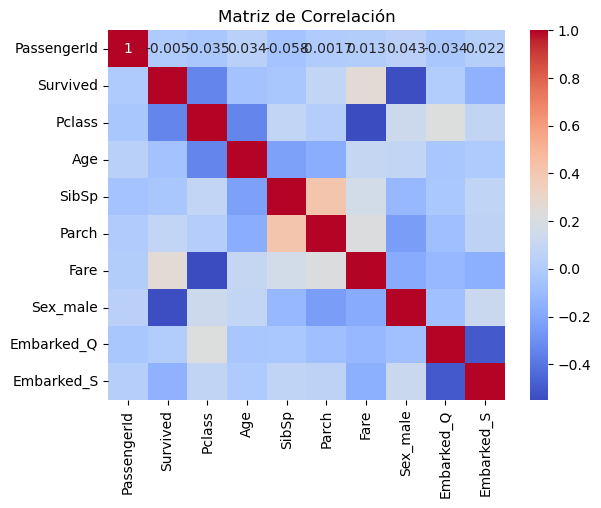

Survived       1.000000
Fare           0.257307
Parch          0.081629
Embarked_Q     0.003650
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.064910
Embarked_S    -0.149683
Pclass        -0.338481
Sex_male      -0.543351
Name: Survived, dtype: float64


In [18]:
# Matriz de correlación
corr_matrix = titanic_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Características más relevantes
print(corr_matrix['Survived'].sort_values(ascending=False))

### 5. Entrenar el modelo configurando los diferentes hiperparámetros.

In [20]:
# Separar características y la variable objetivo
X = titanic_df.drop(columns=['Survived'])
y = titanic_df['Survived']

# División en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 6. Evaluar el desempeño del modelo en el conjunto de Test con métricas como precisión, recall, F1-score, etc.

In [21]:
# Definir el modelo
log_reg = LogisticRegression(max_iter=1000)

# Hiperparámetros a evaluar
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['liblinear', 'lbfgs']
}

# GridSearch para encontrar los mejores hiperparámetros
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Mejor modelo
best_model = grid_search.best_estimator_

print("Mejores hiperparámetros:", grid_search.best_params_)

Mejores hiperparámetros: {'C': 1, 'solver': 'liblinear'}


### 7. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

Accuracy: 0.7989
Precision: 0.7794
Recall: 0.7162
F1-score: 0.7465


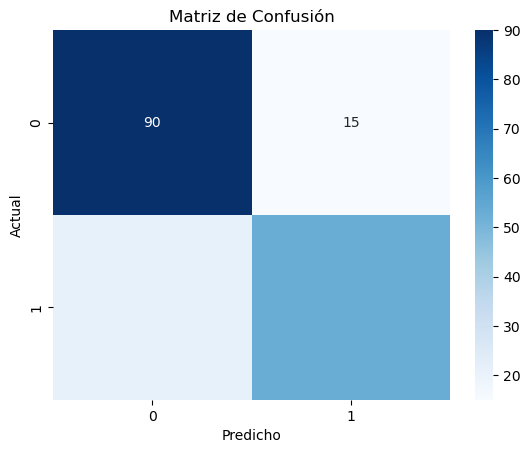

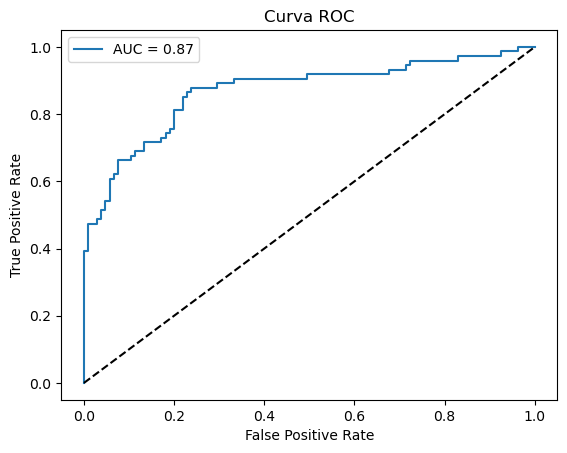

In [22]:
# Predicciones
y_pred = best_model.predict(X_test)

# Métricas de evaluación
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

# Matriz de confusión visualizada
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.ylabel('Actual')
plt.xlabel('Predicho')
plt.show()

# Curva ROC
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend()
plt.show()

### 8. Interpretar, analizar y documentar los resultados obtenidos
##### **Accuracy:** La precisión del modelo fue 0.7989, lo cual indica que el modelo es correcto en un 79.89% de los casos. Esto significa que aproximadamente 8 de cada 10 predicciones realizadas por el modelo son correctas.

##### **Precision:** La precisión del modelo fue 0.7794, lo que sugiere que el 77.94% de las predicciones positivas fueron correctas. En otras palabras, cuando el modelo predice que un pasajero sobrevivió, en el 77.94% de los casos, esta predicción es correcta.

##### **Recall:** El recall del modelo fue 0.7162, lo que indica que el modelo identificó correctamente el 71.62% de las instancias positivas. Esto significa que el modelo logró detectar el 71.62% de los pasajeros que realmente sobreviviero.n

##### **F1-score:** El F1-score del modelo fue 0.7465, proporcionando un balance entre precisión y recall. El F1-score es una métrica combinada que considera tanto la precisión como el recall, y en este caso, su valor sugiere un buen equilibrio entre ambo.s

##### **Curva ROC:** La AUC de la curva ROC indica una buena discriminación entre clases. Si el valor de AUC es cercano a 1, esto significa que el modelo tiene una alta capacidad para distinguir entre pasajeros que sobrevivieron y los que o..
##### El modelo de regresión logística ha demostrado ser efectivo para predecir la supervivencia en el Titanic, con un balance adecuado entre las métricas de evaluación. Las características más influyentes fueron la clase del pasajero y el sexo, lo cual es consistente con el contexto histórico.

### Conclusiones
##### - La mayoría de los sobrevivientes eran mujeres y niños de primera clase.
##### - La edad también tuvo una influencia significativa en la supervivencia.
##### - El preprocesamiento y la selección adecuada de características son cruciales para mejorar el rendimiento del modelo.
##### - Estos resultados proporcionan una visión valiosa sobre los factores que influyeron en la supervivencia de los pasajeros del Titanic y demuestran la efectividad de la regresión logística para problemas de clasificación binaria.


### Cargar en GitHub el código del modelo diseñado https://github.com/